### 911 Calls Capstone Project -  Ronny Coulson

For this project we will analyze 911 calls data that contains the following:

### lat: String variable, Latitute
### Ing: String variable, longitude
### desc: string variable, description of the emergency call
### title: string variable
### timeStamp: string variable,
### twp: string variable, township
### addr: string variable: address
### e: string, Dummy variable

In [62]:
import numpy as pd
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("../data/911.csv") #read file
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [64]:
df["zip"].value_counts().head() #top 5 zip codes

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [65]:
#top 5 townships
df["twp"].value_counts().head()

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [66]:
#unique title codes are
len(df["title"].unique())

148

### create new features
In this title columns are "Reasson/Departments" specified before the little code. These are EMS,Fire and Traffic

In [67]:
x = df["title"].iloc[0]

In [68]:
x.split(':')[0]

'EMS'

In [69]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0])
df["Reason"]

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [70]:
#whats the most common reason for 911 calls based on this new columns
df["Reason"].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

/var/folders/rf/x2s5h30d1_df1kdr5dn33svm0000gn/T/ipykernel_68236/559837613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Reason", data = df, palette="Blues_d")


<Axes: xlabel='Reason', ylabel='count'>

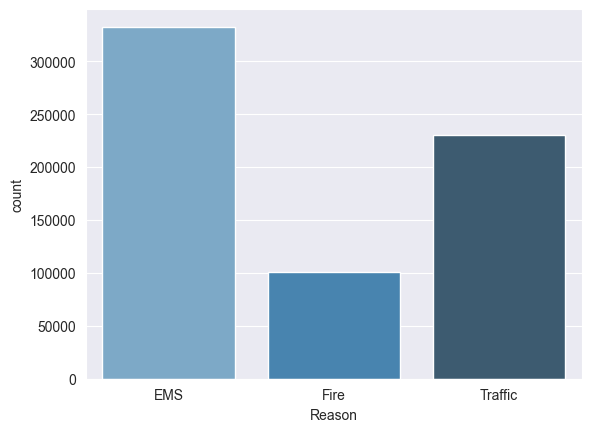

In [71]:
#seaborn to create a countplot of 911 calls by reason
sns.countplot(x = "Reason", data = df, palette="Blues_d")

In [72]:
#time infomation, what is the data type of timeStamp column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [73]:
df["timeStamp"].iloc[0] #string

'2015-12-10 17:10:52'

In [74]:
#turn  timeStamp into date time objs
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
type(df["timeStamp"].iloc[0]) #object

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
time = df["timeStamp"].iloc[0] #specific attribute from DatetIME
time.hour

17

In [76]:
df["Hour"] = df["timeStamp"].apply(lambda time : time.hour)
df["Month"] = df["timeStamp"].apply(lambda time : time.month)
df["Day of Week"] = df["timeStamp"].apply(lambda time : time.dayofweek)

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [77]:
#use map with dictonary to map the actual string name to the day of the week
dmap = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}


In [78]:
df["Day of Week"] = df["Day of Week"].map(dmap)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday


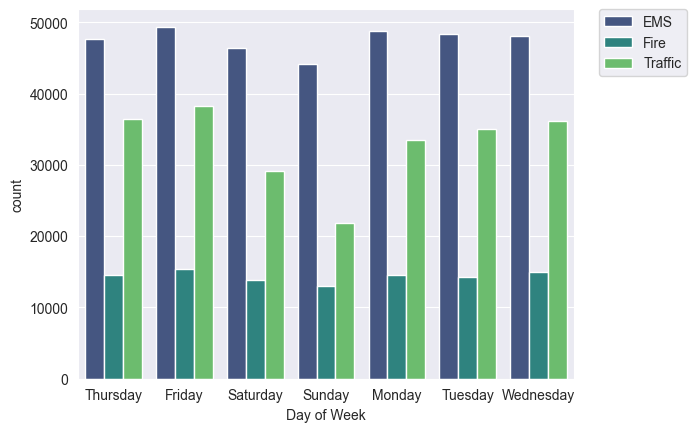

In [82]:
#countplot if the day of the week
sns.countplot(x="Day of Week", data = df, hue="Reason", palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

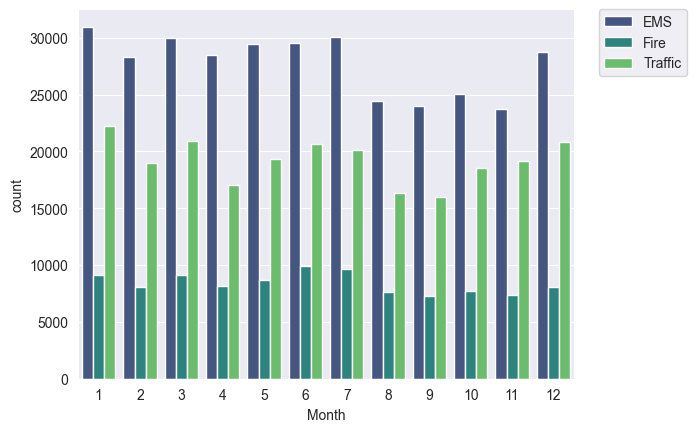

In [83]:
#for more columns
sns.countplot(x="Month", data=df, hue="Reason", palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [118]:
#use a lineplot that use all the months that were missing on the barplots

bymonth = df.groupby("Month").count() #make sure all month all months are here
bymonth.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


<Axes: xlabel='Month'>

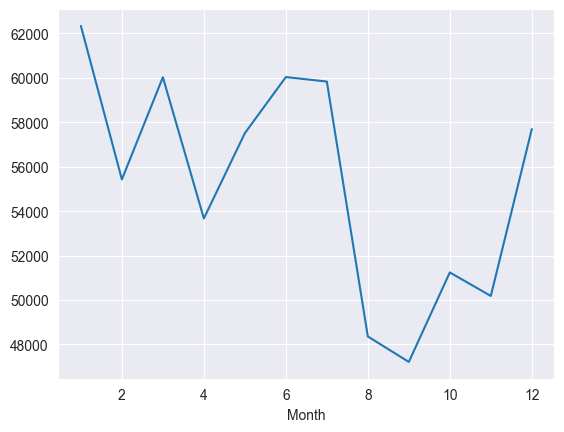

In [91]:
#pot all months with line plot
bymonth["lat"].plot()

/var/folders/rf/x2s5h30d1_df1kdr5dn33svm0000gn/T/ipykernel_68236/1929439679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, palette="viridis")
/var/folders/rf/x2s5h30d1_df1kdr5dn33svm0000gn/T/ipykernel_68236/1929439679.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


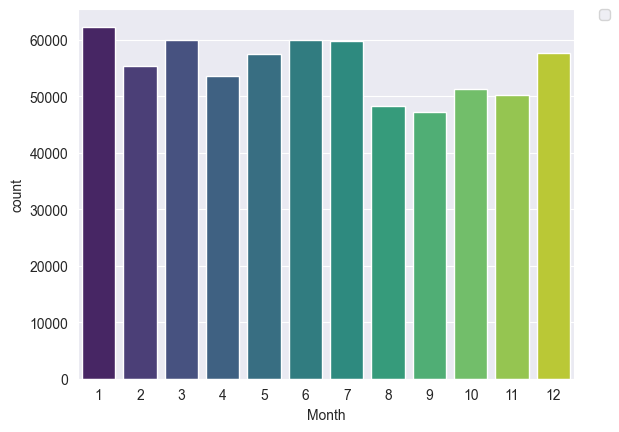

In [93]:
sns.countplot(x="Month", data=df, palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [123]:
#create a new column called Date that contain the date from timeStamp column. You'll need to use apply along with the date() method
t = df["timeStamp"].iloc[0]


In [125]:
df["Date"] = df["timeStamp"].apply(lambda t:t.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10


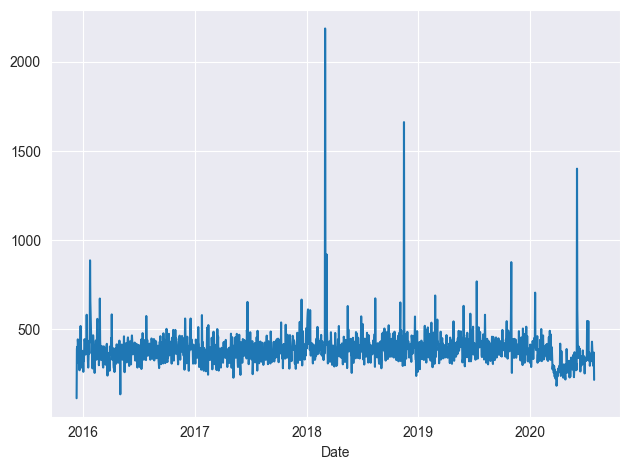

In [130]:
#group date column with count
df.groupby("Date").count()["lat"].plot()
plt.tight_layout()

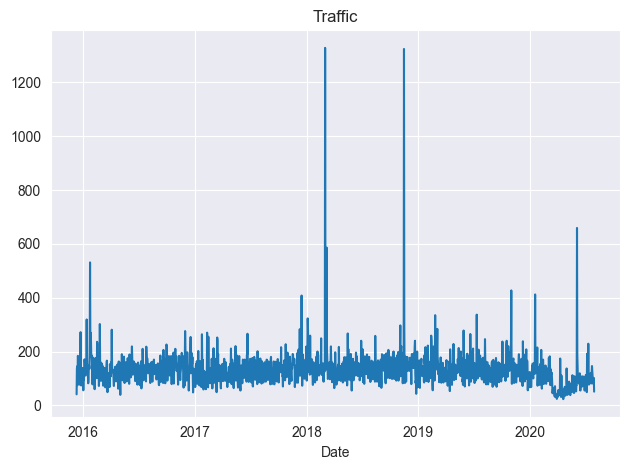

In [134]:
#plot with each plot representinf a Reason for the 911 call
df[df["Reason"] == "Traffic"].groupby("Date").count()["lat"].plot()
plt.title("Traffic")
plt.tight_layout()

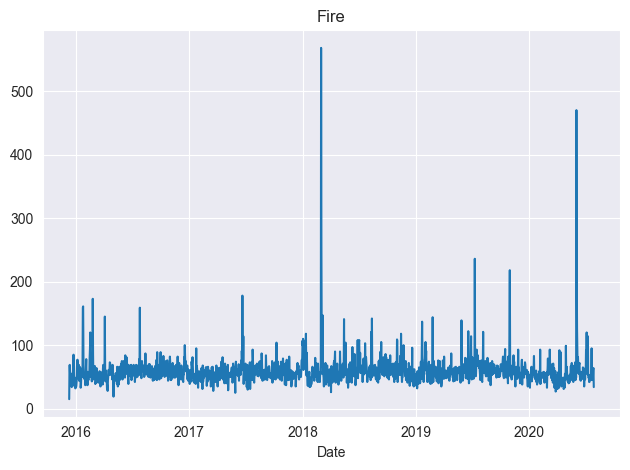

In [136]:
df[df["Reason"] == "Fire"].groupby("Date").count()["lat"].plot()
plt.title("Fire")
plt.tight_layout()

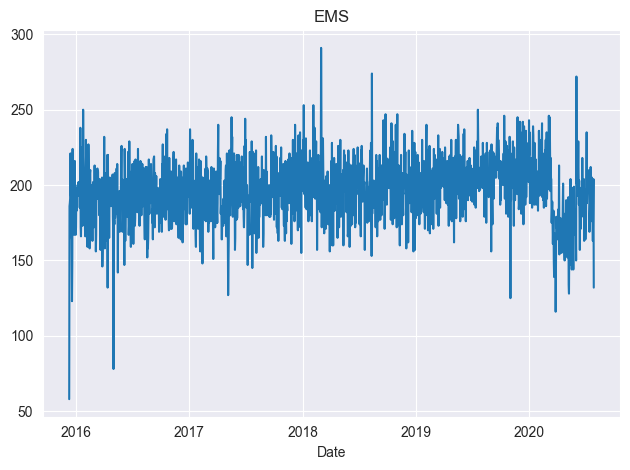

In [137]:
df[df["Reason"] == "EMS"].groupby("Date").count()["lat"].plot()
plt.title("EMS")
plt.tight_layout()

In [138]:
#CREATE: heatmap with seaorn.
#1 - re-structure the data fram so that columns become the Hours nad the index become the day of the week.
#combine groupby with unstack method